# Implementação RNA - Exemplos da aula 04

# Exemplo 1

In [1]:
"""
Exemplo 1
"""
import numpy as np


def f(x):
    return x * (x - 1) * (x - 2) * (x - 3)

def df(x):
    s0 = x
    s1 = x
    s2 = x
    s3 = x
    s4 = s1 - 1
    s5 = s2 - 2
    s6 = s3 - 3
    s7 = s0 * s4
    s8 = s5 * s6
    L = s7 * s8

    grad_L = 1
    grad_s7 = grad_L * s8
    grad_s8 = grad_L * s7
    grad_s6 = grad_s8 * s5
    grad_s5 = grad_s8 * s6
    grad_s4 = grad_s7 * s0
    grad_s3 = grad_s6
    grad_s2 = grad_s5
    grad_s1 = grad_s4
    grad_s0 = grad_s7 * s4
    grad_x = grad_s0 + grad_s1 + grad_s2 + grad_s3

    return grad_x


def main():
    # np.random.seed(1)

    x = np.random.rand() * 3 # escolha x aleatoriamente

    for k in range(10):
        print(x, df(x), f(x))
        x = x - 0.1 * df(x) # atualiza o valor de x utilizando o gradiente descendente

    print(x, f(x))

if __name__ == '__main__':
    main()

0.3861854449207809 0.0419557765574225 -0.9999113175327258
0.38198986726503864 0.00023855251398441357 -0.9999999971545135
0.3819660120136402 7.6353507960647e-09 -1.0
0.38196601125010515 -3.3306690738754696e-16 -1.0000000000000002
0.3819660112501052 7.771561172376096e-16 -1.0000000000000002
0.38196601125010515 -3.3306690738754696e-16 -1.0000000000000002
0.3819660112501052 7.771561172376096e-16 -1.0000000000000002
0.38196601125010515 -3.3306690738754696e-16 -1.0000000000000002
0.3819660112501052 7.771561172376096e-16 -1.0000000000000002
0.38196601125010515 -3.3306690738754696e-16 -1.0000000000000002
0.3819660112501052 -1.0000000000000002


---

# Exemplo 2

3.2868306549651464e-08 l
[-0.9992173052228606, 1.9991066314607635, -0.4997835875512998] w
y[0]:  0.5  y_hat(x[0]):  0.5001057386866031
y[1]:  1  y_hat(x[1]):  0.9998616074934672
y[2]:  0.5  y_hat(x[2]):  0.5000503011977315


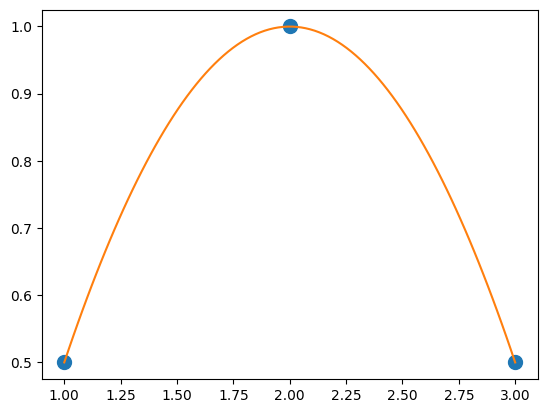

In [2]:
"""
Aula 17/02 - exemplo 2
"""
import numpy as np
import matplotlib.pyplot as plt

def f(w0, w1, w2, x):
    return w0 + w1 * x + w2 * x**2

def df(w0, w1, w2, x0, y0):
    s00 = x0 * w1
    s01 = x0**2 * w2
    s02 = w0 + s00 + s01 - y0
    l = s02**2

    grad_l = 1
    grad_s02 = grad_l * s02
    grad_w0 = grad_s02
    grad_s00 = grad_s02
    grad_s01 = grad_s02
    grad_w1 = grad_s00 * x0
    grad_w2 = grad_s01 * x0**2

    return grad_w0, grad_w1, grad_w2, l

if __name__ == '__main__':
    np.random.seed(1)
    x = [1, 2, 3]
    y = [0.5, 1, 0.5]

    plt.plot(x, y, '.', markersize=20)


    w = [0, 0, 0]
    taxa = 0.01

    rep = 100000
    for k in range(rep):
        grad_w0 = 0.
        grad_w1 = 0.
        grad_w2 = 0.
        l = 0.
        for i in range(3):
            gw0, gw1, gw2, gl = df(w[0], w[1], w[2], x[i], y[i])

            grad_w0 += gw0
            grad_w1 += gw1
            grad_w2 += gw2
            l += gl
        
        w[0] -= taxa * (grad_w0 / 3)
        w[1] -= taxa * (grad_w1 / 3)
        w[2] -= taxa * (grad_w2 / 3)
    print(l, 'l')
    print(w, 'w')

    x_axis = np.linspace(1, 3, 100)
    y_axis = w[0] + w[1] * x_axis + w[2] * x_axis ** 2

    plt.plot(x_axis,y_axis)
    plt.savefig('exemplo1-'+ str(rep) + '.svg')

    print('y[0]: ', y[0], ' y_hat(x[0]): ', f(w[0], w[1], w[2], x[0]))
    print('y[1]: ', y[1], ' y_hat(x[1]): ', f(w[0], w[1], w[2], x[1]))
    print('y[2]: ', y[2], ' y_hat(x[2]): ', f(w[0], w[1], w[2], x[2]))

---

# Exemplo 3

In [4]:
"""
Aula 17/02 - exemplo 3
"""

import numpy as np


def grad_nn(w, x, d):
    # feedforward
    s0 = w[1] * x[0]
    s1 = w[2] * x[1]
    s2 = s0 + s1
    y = w[0] + s2
    e = y - d
    L = e ** 2

    # backward
    grad_L = 1
    grad_e = grad_L * e
    grad_y = grad_e
    grad_s2 = grad_y
    grad_s1 = grad_s2
    grad_s0 = grad_s2
    grad_w0 = grad_y
    grad_w1 = grad_s0 * x[0]
    grad_w2 = grad_s1 * x[1]

    return np.array([grad_w0, grad_w1, grad_w2])

def nn(w, x):
    return np.sign(w[0] + w[1] * x[0] + w[2] * x[1])

def main():
    np.random.seed(1)
    X = [[0., 0.], [0., 1.], [1., 0.], [1., 1.]]
    d = [-1., -1., -1., 1.]
    # w = np.random.rand(3)
    w = np.array([0., 0., 0.])
    taxa = 0.1

    print(nn(w, X[0]))
    print(nn(w, X[1]))
    print(nn(w, X[2]))
    print(nn(w, X[3]))
    print()
    for _ in range(10):
        grad_w = np.array([0., 0., 0.])

        for i in range(4):
            grad_w += grad_nn(w, X[i], d[i] )
        print(grad_w, 'gradiente')
        w -= taxa * grad_w

    print('nn[X[0]] : ', nn(w, X[0]), 'd[0]: ', d[0])
    print('nn[X[1]] : ', nn(w, X[1]), 'd[1]: ', d[1])
    print('nn[X[2]] : ', nn(w, X[2]), 'd[2]: ', d[2])
    print('nn[X[3]] : ', nn(w, X[3]), 'd[3]: ', d[3])


main()

0.0
0.0
0.0
0.0

[2. 0. 0.] gradiente
[ 1.2 -0.4 -0.4] gradiente
[ 0.88 -0.52 -0.52] gradiente
[ 0.736 -0.54  -0.54 ] gradiente
[ 0.6576 -0.5252 -0.5252] gradiente
[ 0.60464 -0.49916 -0.49916] gradiente
[ 0.562448 -0.47034  -0.47034 ] gradiente
[ 0.5256048 -0.4417276 -0.4417276] gradiente
[ 0.49205392 -0.41433028 -0.41433028] gradiente
[ 0.46096446 -0.38844198 -0.38844198] gradiente
nn[X[0]] :  -1.0 d[0]:  -1.0
nn[X[1]] :  -1.0 d[1]:  -1.0
nn[X[2]] :  -1.0 d[2]:  -1.0
nn[X[3]] :  1.0 d[3]:  1.0


---

# Exemplo 4

In [10]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras import initializers

50 acurácia antes do treinamento
0 15.54937933043226
1000 1.4881907440858717
2000 0.8342550697644122
3000 0.539466098871791
4000 0.38051553620369455
5000 0.2992952277913404
6000 0.24968958266458866
7000 0.2148843759749588
8000 0.18919136151312357
9000 0.16946458048443963
acc 100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8956 - loss: 0.0737 


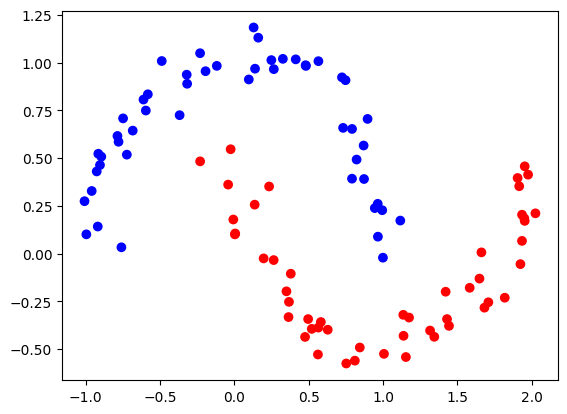

In [11]:
X, Y = datasets.make_moons(100, noise=0.1)

color = ['blue' if k == 0 else 'red' for k in Y]

plt.scatter(X[:, 0], X[:, 1], c=color)
plt.savefig('duas_luas.svg')


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def run_neural_net(x, w0, b0, b1, w1):
    s00 = w0[0, 0] * x[0]
    s01 = w0[0, 1] * x[1]
    s02 = s00 + s01
    v0 = s02 + b0[0]
    y0 = sigmoid(v0)

    s10 = w0[1, 0] * x[0]
    s11 = w0[1, 1] * x[1]
    s12 = s10 + s11
    v1 = s12 + b0[1]
    y1 = sigmoid(v1)

    s20 = y0 * w1[0]
    s21 = y1 * w1[1]
    s22 = s20 + s21
    v2 = s22 + b1[0]
    y2 = sigmoid(v2)
    return 1 if y2 > 0.5 else 0


def neural_net(x, d, w0, b0, b1, w1):
    # forward

    s00 = w0[0, 0] * x[0]
    s01 = w0[0, 1] * x[1]
    s02 = s00 + s01
    v0 = s02 + b0[0]
    y0 = sigmoid(v0)

    s10 = w0[1, 0] * x[0]
    s11 = w0[1, 1] * x[1]
    s12 = s10 + s11
    v1 = s12 + b0[1]
    y1 = sigmoid(v1)

    s20 = y0 * w1[0]
    s21 = y1 * w1[1]
    s22 = s20 + s21
    v2 = s22 + b1[0]
    y2 = sigmoid(v2)
    e = y2 - d
    L = 1/2 * (e ** 2)


    # backward
    grad_w0 = np.zeros(w0.shape)
    grad_w1 = np.zeros(w1.shape)
    grad_b0 = np.zeros(b0.shape)
    grad_b1 = np.zeros(b1.shape)

    grad_L = 1
    grad_e = grad_L * e

    grad_y2 = grad_e
    grad_v2 = grad_y2 * y2 * (1 - y2)
    grad_b1[0] = grad_v2
    grad_s22 = grad_v2
    grad_s21 = grad_s22
    grad_s20 = grad_s22
    grad_w1[1] = grad_s21 * y1
    grad_y1 = grad_s21 * w1[1]

    grad_w1[0] = grad_s20 * y0
    grad_y0 = grad_v2 * w1[0]

    grad_v0 = grad_y0 * y0 * (1 - y0)
    grad_v1 = grad_y1 * y1 * (1 - y1)

    grad_b0[0] = grad_v0
    grad_b0[1] = grad_v1
    grad_s12 = grad_v1
    grad_s02 = grad_v0

    grad_s00 = grad_s02
    grad_s01 = grad_s02
    grad_s10 = grad_s12
    grad_s11 = grad_s12
    grad_w0[0, 0] = grad_s00 * x[0]
    grad_w0[0, 1] = grad_s01 * x[1]
    grad_w0[1, 0] = grad_s10 * x[0]
    grad_w0[1, 1] = grad_s11 * x[1]
    return grad_w0, grad_b0, grad_w1, grad_b1, L

def main():
    # inicialização aleatória
    w0 = np.random.rand(2, 2)
    w1 = np.random.rand(2)
    b0 = np.random.rand(2)
    b1 = np.random.rand(1)

    # taxa de aprendizado
    taxa = 0.1

    acc = 0
    for i in range(100):
        out = run_neural_net(X[i], w0, b0, b1, w1)
        if out == Y[i]:
            acc += 1
    print(acc, "acurácia antes do treinamento")

    # gradiente descendente
    for i in range(10000):
        loss = 0

        grad_w0 = np.zeros(w0.shape)
        grad_w1 = np.zeros(w1.shape)
        grad_b0 = np.zeros(b0.shape)
        grad_b1 = np.zeros(b1.shape)

        for k in range(100):
            g_w0, g_b0, g_w1, g_b1, L = neural_net(X[k], Y[k], w0, b0, b1, w1)

            grad_w0 += g_w0
            grad_w1 += g_w1
            grad_b0 += g_b0
            grad_b1 += g_b1
            loss += L

        w0 -= taxa * grad_w0
        w1 -= taxa * grad_w1
        b0 -= taxa * grad_b0
        b1 -= taxa * grad_b1

        if i % 1000 == 0:
            print(i, loss)

    # acurácia após o treinamento
    acc = 0
    for i in range(100):
        out = run_neural_net(X[i],  w0, b0, b1, w1)
        if out == Y[i]:
            acc += 1
    print('acc', acc)

    model = Sequential()
    model.add(Dense(5, input_dim=2, activation='relu'))
    model.add(Dense(5, activation='tanh'))
    model.add(Dense(1, activation='sigmoid'))

    opt = SGD(learning_rate=taxa)
    model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])
    model.fit(X, Y, epochs=100, verbose=False, batch_size=5)

    acc = model.evaluate(X, Y)


main()